Video I followed: https://www.youtube.com/watch?v=tpCFfeUEGs8


In [1]:
#importing modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)


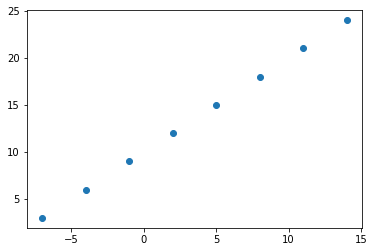

In [ ]:
#Creating features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(x,y)

In [ ]:
#Tensor Input and Output shapes for house price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Model, compiler and fit function for sample
# Set random seed
tf.random.set_seed(42)

# Step 1: Create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                          
]) 

# Step2: Compiling the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Step 3: Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated version
#model.fit(X, y, epochs=5) <- previous versions
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

In [ ]:
model.predict([[17.0]])

array([[30.158512]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
  
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
model.predict([[17.0]])

array([[7.5954914]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
  
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
model.predict([[17.0]])

array([[27.70061]], dtype=float32)

In [2]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

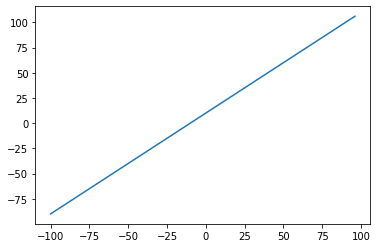

In [ ]:
plt.plot(X,y)

In [4]:
X_train = X[:40] #first 40 are the  trainning samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]


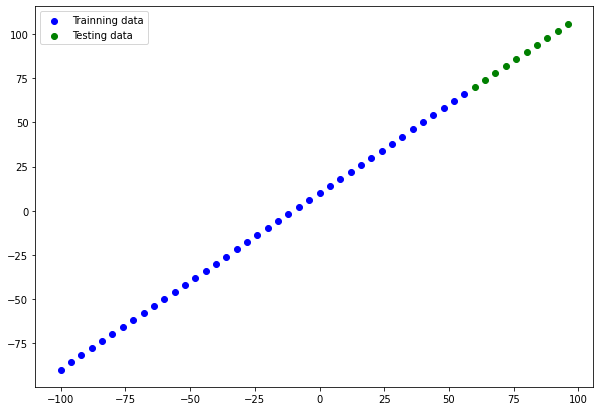

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = "b" , label = "Trainning data")
plt.scatter(X_test, y_test, c = "g" , label = "Testing data")
plt.legend()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [6]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1,name = "output_layers")
], name= "model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layers (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

In [9]:
model.predict([100.0])

array([[116.42943]], dtype=float32)

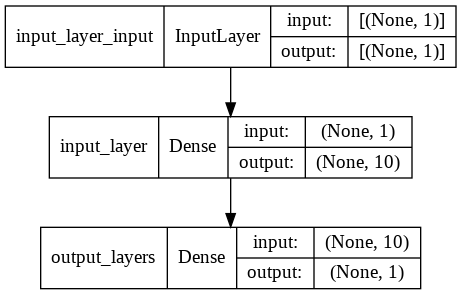

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Practice the above one to make better prediction ^

In [51]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(10,input_shape=[1]),
  tf.keras.layers.Dense(1,name = "output_layers")
], name= "model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(X_train, y_train, epochs=500, verbose=0)

In [52]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.873505],
       [ 74.93439 ],
       [ 78.99527 ],
       [ 83.056145],
       [ 87.11703 ],
       [ 91.17791 ],
       [ 95.23879 ],
       [ 99.29967 ],
       [103.360565],
       [107.42142 ]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [53]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b", label="Trainning Data")
  plt.scatter(test_data,test_labels, c= "g", label="Testing Data")
  plt.scatter(test_data,predictions, c="r", label="Predictions")
  plt.legend()
  


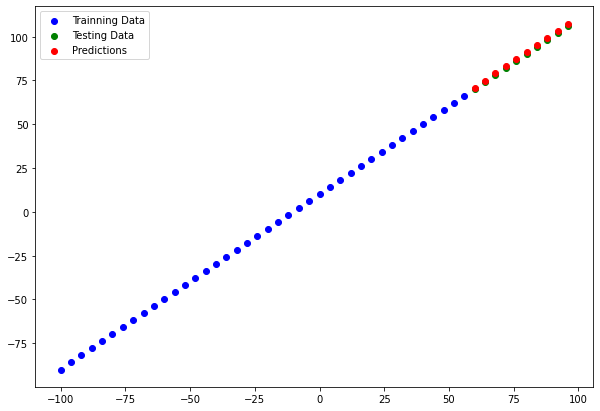

In [54]:
plot_predictions()

In [55]:
y_pred = tf.constant(y_pred)

In [56]:
#Calculating Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.1474686>

In [57]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.3472621>

In [58]:
Huber = tf.keras.losses.Huber()
Huber(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.648485>

Downloading a Model from Google Collab


In [ ]:
from google.colab import files
files.download("modelname.extension")

In [ ]:
#show google drive contents (Need to mount drive first)
!ls /content/drive/MyDrive

In [ ]:
import pandas as pd
insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

In [2]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
